In [142]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

In [143]:
# Task 2.1
csv_file = "2017_jun_final.csv"
df = pd.read_csv(csv_file, header=0)

In [144]:
# Task 2.2 
df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [145]:
# Task 2.3 
df.shape

(8704, 25)

In [146]:
# Task 2.4 
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [147]:
# Task 2.5 
columns = df.columns
total_missing_data = np.sum(pd.isnull(df[columns[1:]]))

In [148]:
total_missing_data

Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls                                 1574
dtype: int64

In [149]:
# Task 2.6 
def del_nan_columns(df: DataFrame) -> DataFrame:
    counter = 1
    while counter < len(columns):
        empty_fields = np.sum(pd.isnull(df[columns[counter]]))
        if empty_fields > 0 and columns[counter] != "Язык.программирования":
            df = df.drop([columns[counter]], axis=1)
        counter += 1

    return df


df = del_nan_columns(df)

In [150]:
df

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,средний,12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700
8700,8701,Marketing,NaN,0.5,0.5,400,120,Киев,до 50 человек,Продуктовая,женский,22,Высшее,False,ниже среднего,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львов,до 10 человек,Аутстаффинговая,мужской,30,Незаконченное высшее,False,выше среднего,12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800
8702,8703,Team lead,NaN,6,4,2600,0,Днепр,свыше 1000 человек,Аутсорсинговая,мужской,34,Высшее,False,продвинутый,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600


In [151]:
# Task 2.7 
columns = df.columns
total_missing_data = np.sum(pd.isnull(df[columns[1:]]))

In [152]:
total_missing_data

Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [153]:
# Task 2.8 
df = df.dropna()

In [154]:
df

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,меньше 3 месяцев,600,100,Хмельницкий,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
7,8,Senior Software Engineer,C++,6,1,3300,500,Киев,до 10 человек,Продуктовая,мужской,28,Высшее,False,выше среднего,12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,8693,Software Engineer,Java,5,1,3500,650,Удаленно,до 200 человек,Аутсорсинговая,женский,28,Высшее,False,средний,12/07/2017 13:26:49,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,3500
8694,8695,Junior Software Engineer,C#/.NET,1,1,550,550,Харьков,до 200 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/07/2017 14:14:33,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:54.0) ...,1.0,1.0,550
8695,8696,Software Engineer,Python,1,0.5,1500,1000,Киев,до 10 человек,Стартап,мужской,29,Высшее,False,средний,12/07/2017 14:39:21,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,1500
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львов,до 10 человек,Аутстаффинговая,мужской,30,Незаконченное высшее,False,выше среднего,12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800


In [155]:
# Task 2.9 
df.shape

(4854, 20)

In [156]:
# Task 2.10 
py_series = df["Язык.программирования"] == "Python"
python_data = df.loc[py_series]  # Передається або int або Series

In [157]:
python_data

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,5,1,2000,800,Запорожье,до 50 человек,Аутсорсинговая,мужской,22,Незаконченное высшее,False,средний,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000
8625,8626,Software Engineer,Python,4,1,1750,0,Киев,свыше 1000 человек,Аутсорсинговая,мужской,28,Среднее,False,средний,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750
8635,8636,Senior Software Engineer,Python,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,Стартап,мужской,33,Высшее,False,выше среднего,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000
8673,8674,Junior Software Engineer,Python,0.5,0.5,350,50,Киев,до 50 человек,Аутсорсинговая,мужской,22,Высшее,False,средний,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350


In [158]:
# Task 2.11 
python_data.shape

(207, 20)

In [159]:
# Task 2.12
dev_dfgby = python_data.groupby("Должность")

In [160]:
dev_dfgby

In [161]:
# Task 2.13
min_max_sal = dev_dfgby["Зарплата.в.месяц"].agg(["min", "max"])

In [162]:
min_max_sal

,min,max
Должность,,
Junior Software Engineer,100,1250
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


In [163]:
# Task 2.14
def fill_avg_salary(row):
    row["avg"] = row[["min", "max"]].mean()
    row["position"] = row.name
    return row


df1 = min_max_sal.apply(fill_avg_salary, axis=1)
df1 = df1[["position", "min", "max", "avg"]]

In [164]:
df1

,position,min,max,avg
Должность,,,,
Junior Software Engineer,Junior Software Engineer,100.0,1250.0,675.0
Senior Software Engineer,Senior Software Engineer,1300.0,9200.0,5250.0
Software Engineer,Software Engineer,500.0,5400.0,2950.0
System Architect,System Architect,3000.0,5000.0,4000.0
Technical Lead,Technical Lead,1425.0,6200.0,3812.5


In [165]:
# Task 2.15
df1["avg"].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

In [166]:
# Task 2.16
df1.to_csv("py_sal.csv", index=False)

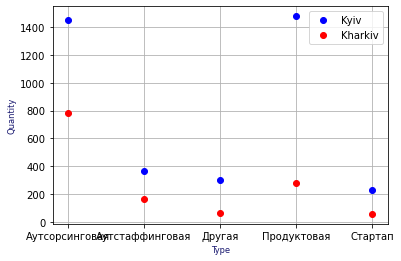

In [167]:
# Chart 1 
plt.close("all")
df = pd.read_csv(csv_file, header=0)
comp_type = df.groupby(["Тип.компании", "Город"])["Город"].count()
kyiv = comp_type[:, "Киев"]
kharkiv = comp_type[:, "Харьков"]

plt.plot(kyiv, "bo", label="Kyiv")
plt.plot(kharkiv, "ro", label="Kharkiv")
plt.xlabel("Type", fontsize="small", color="midnightblue")
plt.ylabel("Quantity", fontsize="small", color="midnightblue")
plt.legend()
plt.grid()
plt.show()
plt.close("all")

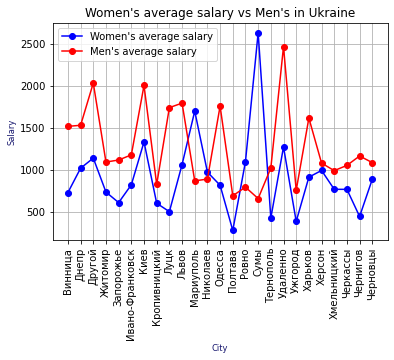

In [169]:
df = pd.read_csv(csv_file, header=0)
sal_sex = df.groupby(["Пол", "Город"])["Зарплата.в.месяц"].agg("mean")
f_sal = sal_sex["женский"]
m_sal = sal_sex["мужской"]

plt.plot(f_sal, "b-o", label="Women's average salary")
plt.plot(m_sal, "r-o", label="Men's average salary")
plt.xticks(rotation=90)
plt.xlabel("City", fontsize="small", color="midnightblue")
plt.ylabel("Salary", fontsize="small", color="midnightblue")
plt.title("Women's average salary vs Men's in Ukraine")
plt.legend()
plt.grid()
plt.show()

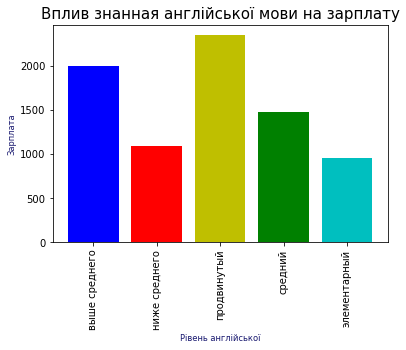

In [170]:
# Chart 3
df = pd.read_csv(csv_file, header=0)
eng_sal = df.groupby(["Уровень.английского"])["Зарплата.в.месяц"].agg(
    ["min", "max", "mean"]
)

data = eng_sal["mean"]
labels = eng_sal.index

plt.bar(
    labels,
    data,
    color=["b", "r", "y", "g", "c"],
)

plt.xlabel("Рівень англійської", fontsize="small", color="midnightblue")
plt.ylabel("Зарплата", fontsize="small", color="midnightblue")
plt.xticks(rotation=90)
plt.title("Вплив знанная англійської мови на зарплату", fontsize=15)
plt.show()
plt.close("all")